In [1]:
import os, sys

import numpy as np
import pandas as pd
import time, random, math
import copy, gc
from collections import deque
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
import torch
from torch.optim import Adam
from torch.distributions import Categorical

In [2]:
from method_1 import SearchAvailablePosition
from method_2 import SearchAction
from method_3 import ChangeBoard

from Othello import Othello

In [3]:
from RL.train_model import test, get_play_data, randomAgent, greedyAgent
#from RL.model import Model, basis_conv2d
from RL.optimize_model import optimize_a2cmodel as optimize_model
from RL.A2C_agent import agent as a2c_agent
from RL.DQN_agent import agent as dqn_agent
from RL.Replay_Memory import Replay_Memory
#test()

In [9]:
win_1 = []
win_2 = []
l=[]

dqn = dqn_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)
random_agent = randomAgent()
greedy_agent = greedyAgent()
memory = Replay_Memory(50)

In [14]:
for i in tqdm(range(200)):
    for _ in range(2):
        tmp_w_1 = 0
        tmp_w_2 = 0
        agent_2 = random.choice([random_agent, greedy_agent])
        data_1, data_2 = get_play_data(dqn , agent_2)
        memory.push(data_1)
        memory.push(data_2)
        tmp_w_1+=int(data_1['rewards'][0]/5)
        tmp_w_2+=int(data_2['rewards'][0]/5)
        
    win_1.append(tmp_w_1)    
    win_2.append(tmp_w_2)    
    dqn.optimize_model(memory)
    #agent_2.optimize_model(memory)

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

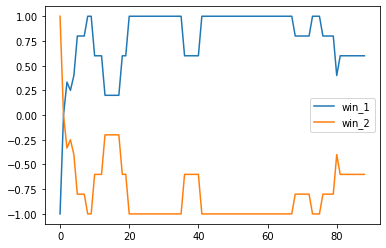

In [15]:
win_1_df = pd.DataFrame(win_1).rolling(5,min_periods=1).mean()
plt.plot(win_1_df, label='win_1')
win_2_df = pd.DataFrame(win_2).rolling(5,min_periods=1).mean()
plt.plot(win_2_df, label='win_2')
plt.legend()
plt.show()

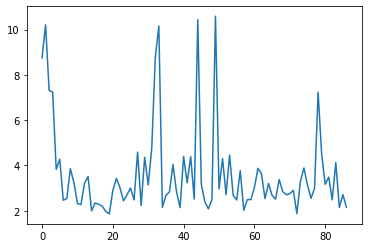

In [16]:
plt.plot(dqn.loss_1_list)
plt.show()

In [19]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:1]], dim=0)
policy = dqn.policy_model(s)["policy"]
policy = policy[[2]].detach().numpy()[0]

In [20]:
policy.argmax()

0

In [21]:
a = list(np.where(policy>-1e10)[0])
[random.choice(a) for _ in range(10)]

[24, 13, 4, 61, 4, 39, 43, 60, 7, 27]

In [22]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:40]], dim=0)
policy = dqn.policy_model(s)["policy"]
print(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].tolist())

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0

In [23]:
#!pip install -U seaborn

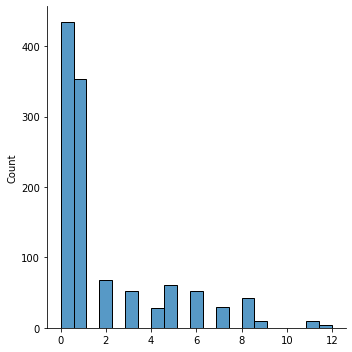

In [26]:
sns.displot(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-1].detach().numpy().flatten())
plt.show()

In [27]:
random_agent = randomAgent()

In [28]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [30]:
for _ in tqdm(range(500)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = dqn.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [31]:
print(w_1,w_2,draw)

424 61 15


In [34]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [35]:
for _ in tqdm(range(500)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = dqn.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [36]:
print(w_1,w_2,draw)

29 449 22


In [7]:
dqn_1 = dqn_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)
#dqn_2 = dqn_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)

In [17]:
win_1 = []
win_2 = []
l=[]
random_agent = randomAgent()
greedy_agent = greedyAgent()
memory = Replay_Memory(100)

In [18]:
for i in tqdm(range(800)):
    if i%8==0:
        dqn_2 = copy.deepcopy(dqn_1)
    for _ in range(1):
        tmp_w_1 = 0
        tmp_w_2 = 0
        
        data_1, data_2 = get_play_data(dqn_1 , dqn_2)
        memory.push(data_1)
        memory.push(data_2)
        tmp_w_1+=int(data_1['rewards'][0]/5)
        tmp_w_2+=int(data_2['rewards'][0]/5)
        
        data_2, data_1 = get_play_data(dqn_2 , dqn_1)
        memory.push(data_1)
        memory.push(data_2)
        tmp_w_1+=int(data_1['rewards'][0]/5)
        tmp_w_2+=int(data_2['rewards'][0]/5)
        gc.collect()
        
        
    win_1.append(tmp_w_1)    
    win_2.append(tmp_w_2)    
    dqn_1.optimize_model(memory)

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

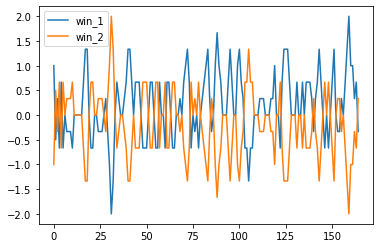

In [19]:
win_1_df = pd.DataFrame(win_1).rolling(3,min_periods=1).mean()
plt.plot(win_1_df, label='win_1')
win_2_df = pd.DataFrame(win_2).rolling(3,min_periods=1).mean()
plt.plot(win_2_df, label='win_2')
plt.legend()
plt.show

In [20]:
othello = Othello()

w_1=0
w_2=0
draw=0

for _ in tqdm(range(500)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = dqn_1.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [21]:
print(w_1,w_2,draw)

34 437 29


In [22]:
#torch.save(dqn_1.policy_model.state_dict(), 'dqn_param_1.pt')